This code implements a binary classifier to distinguish between the numbers 0 and 1 from the MNIST dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from numpy import array
from keras.utils import to_categorical
from keras.utils.generic_utils import get_custom_objects
import keras
from keras import metrics
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.constraints import Constraint
from keras import backend as K
from keras import initializers
from google.colab import files
import csv

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).

In [ ]:
# expand new axis, channel axis 
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# resize the input shape , i.e. old shape: 28, new shape: 10
x_train = tf.image.resize(x_train, [10,10]) 
x_test = tf.image.resize(x_test, [10,10]) 

x_train = np.squeeze(x_train, axis =3)
x_test = np.squeeze(x_test, axis =3)
print(x_train.shape, x_test.shape)

(60000, 10, 10) (10000, 10, 10)


In [ ]:
# total number of training and testing data
num_train_data = x_train.shape[0]
num_test_data = x_test.shape[0]

x=0
y=0
num_images_0 = 0
num_images_1 = 0
num_images_2 = 0
num_images_3 = 0
num_images_4 = 0
num_images_5 = 0
num_images_6 = 0
num_images_7 = 0
num_images_8 = 0
num_images_9 = 0

num_images_test_0 = 0
num_images_test_1 = 0

for i in range(num_train_data):
  x +=1
  if (y_train[i] == 0):
    num_images_0 += 1
  elif (y_train[i] == 1):
    num_images_1 += 1
  elif (y_train[i] == 2):
    num_images_2 += 1
  elif (y_train[i] == 3):
    num_images_3 += 1
  elif (y_train[i] == 4):
    num_images_4 += 1
  elif (y_train[i] == 5):
    num_images_5 += 1
  elif (y_train[i] == 6):
    num_images_6 += 1
  elif (y_train[i] == 7):
    num_images_7 += 1
  elif (y_train[i] == 8):
    num_images_8 += 1
  elif (y_train[i] == 9):
    num_images_9 += 1

################# The same Thing can be done for test data
for i in range(num_test_data):
  y +=1
  if (y_test[i] == 0):
    num_images_test_0 += 1
  elif (y_test[i] == 1):
    num_images_test_1 += 1

In [ ]:
# (1) needs to be changed for different neurons
num_train_01 = num_images_0 + num_images_1
num_train_02 = num_images_0 + num_images_2
num_train_03 = num_images_0 + num_images_3
num_train_04 = num_images_0 + num_images_4
num_train_05 = num_images_0 + num_images_5
num_train_06 = num_images_0 + num_images_6
num_train_07 = num_images_0 + num_images_7
num_train_08 = num_images_0 + num_images_8
num_train_09 = num_images_0 + num_images_9
num_train_12 = num_images_1 + num_images_2
num_train_13 = num_images_1 + num_images_3
num_train_14 = num_images_1 + num_images_4
num_train_15 = num_images_1 + num_images_5
num_train_16 = num_images_1 + num_images_6
num_train_17 = num_images_1 + num_images_7
num_train_18 = num_images_1 + num_images_8
num_train_19 = num_images_1 + num_images_9
num_train_23 = num_images_2 + num_images_3
num_train_24 = num_images_2 + num_images_4
num_train_25 = num_images_2 + num_images_5
num_train_26 = num_images_2 + num_images_6
num_train_27 = num_images_2 + num_images_7
num_train_28 = num_images_2 + num_images_8
num_train_29 = num_images_2 + num_images_9
num_train_34 = num_images_3 + num_images_4
num_train_35 = num_images_3 + num_images_5
num_train_36 = num_images_3 + num_images_6
num_train_37 = num_images_3 + num_images_7
num_train_38 = num_images_3 + num_images_8
num_train_39 = num_images_3 + num_images_9
num_train_45 = num_images_4 + num_images_5
num_train_46 = num_images_4 + num_images_6
num_train_47 = num_images_4 + num_images_7
num_train_48 = num_images_4 + num_images_8
num_train_49 = num_images_4 + num_images_9
num_train_56 = num_images_5 + num_images_6
num_train_57 = num_images_5 + num_images_7
num_train_58 = num_images_5 + num_images_8
num_train_59 = num_images_5 + num_images_9
num_train_67 = num_images_6 + num_images_7
num_train_68 = num_images_6 + num_images_8
num_train_69 = num_images_6 + num_images_9
num_train_78 = num_images_7 + num_images_8
num_train_79 = num_images_7 + num_images_9
num_train_89 = num_images_8 + num_images_9

# test test set
num_test_01 = num_images_test_0 + num_images_test_1

In [ ]:
num_train_01

12665

In [ ]:
num_test_01

2115

In [ ]:
# (1) added to the one neuron code
#define an empty array
x_train_16 = np.empty([num_train_data, 10, 10])
x_test_16 = np.empty([num_test_data, 10, 10])

In [ ]:
# (2) added to the one neuron code
# train dataset pixel level adjustment to values between 0 and 15
for counter in range(0, (num_train_data-1), 1):
  # seperating an image from the dataset
  reduced_pixel = np.array(x_train[counter])
  # changing the pixel values
  for i in range (reduced_pixel[0].size):
    for j in range (reduced_pixel[1].size):
      if reduced_pixel[i][j] <= 15.9375:
        reduced_pixel[i][j] = 0
      elif 15.9375 < reduced_pixel[i][j] <= 31.875:
        reduced_pixel[i][j] = 1
      elif 31.875 < reduced_pixel[i][j] <= 47.8125:
        reduced_pixel[i][j] = 2
      elif 47.8125 < reduced_pixel[i][j] <= 63.75:
        reduced_pixel[i][j] = 3
      elif 63.75 < reduced_pixel[i][j] <= 79.6875:
        reduced_pixel[i][j] = 4
      elif 79.6875 < reduced_pixel[i][j] <= 95.625:
        reduced_pixel[i][j] = 5
      elif 95.625 < reduced_pixel[i][j] <= 111.5625:
        reduced_pixel[i][j] = 6
      elif 111.5625 < reduced_pixel[i][j] <= 127.5:
        reduced_pixel[i][j] = 7
      elif 127.5 < reduced_pixel[i][j] <= 143.4375:
        reduced_pixel[i][j] = 8
      elif 143.4375 < reduced_pixel[i][j] <= 159.375:
        reduced_pixel[i][j] = 9
      elif 159.375 < reduced_pixel[i][j] <= 175.3125:
        reduced_pixel[i][j] = 10
      elif 175.3125 < reduced_pixel[i][j] <= 191.25:
        reduced_pixel[i][j] = 11
      elif 191.25 < reduced_pixel[i][j] <= 207.1875:
        reduced_pixel[i][j] = 12
      elif 207.1875 < reduced_pixel[i][j] <= 223.125:
        reduced_pixel[i][j] = 13
      elif 223.125 < reduced_pixel[i][j] <= 239.0625:
        reduced_pixel[i][j] = 14
      elif 239.0625 < reduced_pixel[i][j] <= 255:
        reduced_pixel[i][j] = 15
  # adding the image back to the dataset
  x_train_16[counter] = reduced_pixel

# test dataset pixel level adjustment
for counter1 in range(0, (num_test_data-1), 1):
  # seperating an image from the dataset
  reduced_pixel1 = np.array(x_test[counter1])
  # changing the pixel values
  for i in range (reduced_pixel1[0].size):
    for j in range (reduced_pixel1[1].size):
      if reduced_pixel1[i][j] <= 15.9375:
        reduced_pixel1[i][j] = 0
      elif 15.9375 < reduced_pixel1[i][j] <= 31.875:
        reduced_pixel1[i][j] = 1
      elif 31.875 < reduced_pixel1[i][j] <= 47.8125:
        reduced_pixel1[i][j] = 2
      elif 47.8125 < reduced_pixel1[i][j] <= 63.75:
        reduced_pixel1[i][j] = 3
      elif 63.75 < reduced_pixel1[i][j] <= 79.6875:
        reduced_pixel1[i][j] = 4
      elif 79.6875 < reduced_pixel1[i][j] <= 95.625:
        reduced_pixel1[i][j] = 5
      elif 95.625 < reduced_pixel1[i][j] <= 111.5625:
        reduced_pixel1[i][j] = 6
      elif 111.5625 < reduced_pixel1[i][j] <= 127.5:
        reduced_pixel1[i][j] = 7
      elif 127.5 < reduced_pixel1[i][j] <= 143.4375:
        reduced_pixel1[i][j] = 8
      elif 143.4375 < reduced_pixel1[i][j] <= 159.375:
        reduced_pixel1[i][j] = 9
      elif 159.375 < reduced_pixel1[i][j] <= 175.3125:
        reduced_pixel1[i][j] = 10
      elif 175.3125 < reduced_pixel1[i][j] <= 191.25:
        reduced_pixel1[i][j] = 11
      elif 191.25 < reduced_pixel1[i][j] <= 207.1875:
        reduced_pixel1[i][j] = 12
      elif 207.1875 < reduced_pixel1[i][j] <= 223.125:
        reduced_pixel1[i][j] = 13
      elif 223.125 < reduced_pixel1[i][j] <= 239.0625:
        reduced_pixel1[i][j] = 14
      elif 239.0625 < reduced_pixel1[i][j] <= 255:
        reduced_pixel1[i][j] = 15
  # adding the image back to the dataset
  x_test_16[counter1] = reduced_pixel1

In [ ]:
# (3) added to the code
x_train = x_train_16
x_test = x_test_16

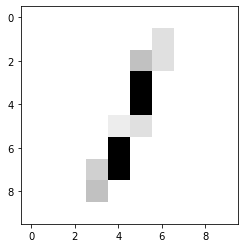

In [ ]:
# (3-1) just for test
test1 = x_test[7000]
plt.imshow(test1, cmap='Greys')

In [ ]:
# (3-2) just for test
test1

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  5.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 14.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [ ]:
# Train/test data for 0 vs 1
x_train_01 = np.empty([num_train_01, 10, 10])
y_train_01 = np.empty([num_train_01,])

################# The same Thing can be done for test data
x_test_01 = np.empty([num_test_01, 10, 10]) 
y_test_01 = np.empty([num_test_01,])

In [ ]:
x_train_01.shape

(12665, 10, 10)

In [ ]:
x_test_01.shape

(2115, 10, 10)

In [ ]:
y_test_01.shape

(2115,)

In [ ]:
# 0 vs 1
idx_01 = 0
# (2) needs to be changed for different neurons
# this value would correspond to labet 1 binary
label1 = 0
# this value would correspond to labet 0 binary
label0 = 1
# end
for i in range(num_train_data):
  if (y_train[i] == label1):
    x_train_01[idx_01] = x_train[i]
    y_train_01[idx_01] = 1
    idx_01 += 1
  elif (y_train[i] == label0):
    x_train_01[idx_01] = x_train[i]
    y_train_01[idx_01] = 0
    idx_01 += 1

In [ ]:
x_train_01.shape

(12665, 10, 10)

0.0


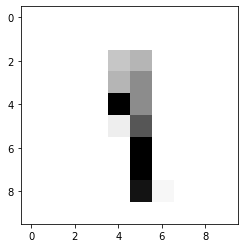

In [ ]:
#used to visulaize images from the dataset
image_index = 1000 # You may select anything up to 60,000
print(y_train_01[image_index]) 
plt.imshow(x_train_01[image_index], cmap='Greys')

The MNIST Dataset is ready for processing.

In [ ]:
# 0 vs 1
idx_01 = 0
# (2) needs to be changed for different neurons
# this value would correspond to labet 1 binary
label1 = 0
# this value would correspond to labet 0 binary
label0 = 1
# end
for i in range(num_test_data):
  if (y_test[i] == label1):
    x_test_01[idx_01] = x_test[i]
    y_test_01[idx_01] = 1
    idx_01 += 1
  elif (y_test[i] == label0):
    x_test_01[idx_01] = x_test[i]
    y_test_01[idx_01] = 0
    idx_01 += 1

0.0


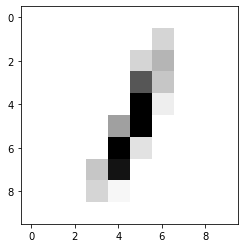

In [ ]:
#used to visulaize images from the dataset
image_index = 1108 # You may select anything up to 60,000
print(y_test_01[image_index]) 
plt.imshow(x_test_01[image_index], cmap='Greys')

In [ ]:
# (4) changes were made here
# Determining the values for weights
# Determining the values for weights
initializerKernel = tf.keras.initializers.RandomNormal(mean=0.004, stddev=0.004)
initializerBias = initializers.Zeros()
lr = 0.0001
eps = 1e-02
metrics_eval = ['MeanSquaredError']
loss_train = 'mean_squared_error'
b_min = 0
b_max = 0
image_size = (10, 10, 1)
weight_matrix = (10,10)
num_filters = 1
num_epochs = 10
num_batches = 8
validation_size = 0.001

# to reverse the effect of the sigmoid function
Vth_sigmoid = 0.5 # y-intersect of sigmoid (depends on the threshold voltage = Vth)
# hardware parameters
Vth = 0.4
C = 1
min_charge = 0
max_charge = 0.015706

In [ ]:
y_train_01

array([1., 0., 0., ..., 0., 1., 0.])

In [ ]:
x_train_01 = np.expand_dims(x_train_01, axis=-1)

In [ ]:
x_test_01 = np.expand_dims(x_test_01, axis=-1)

Keras Model

In [ ]:
def custom_activation(x):
    return (K.sigmoid(((x/C)-Vth)))   
get_custom_objects().update({'custom_activation': Activation(custom_activation)})

class paramLimit(Constraint):
    def __init__(self, min_value, max_value):
        self.min_value = min_value
        self.max_value = max_value

    def __call__(self, w):        
        return K.clip(w, self.min_value, self.max_value)

    def get_config(self):
        return {'min_value': self.min_value,
                'max_value': self.max_value}

class biasLimit(Constraint):
    def __init__(self, min_value, max_value):
        self.min_value = min_value
        self.max_value = max_value

    def __call__(self, w):        
        return K.clip(w, self.min_value, self.max_value)

    def get_config(self):
        return {'min_value': self.min_value,
                'max_value': self.max_value}

def recall(y_true, y_pred):
    y_true = K.ones_like(y_true)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

    recall = true_positives / (all_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    y_true = K.ones_like(y_true)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))

    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
# Create Neural network
model = Sequential()  #activation=tf.nn.relu
# Convolutional model
model.add(Conv2D(num_filters, kernel_size=weight_matrix, activation=custom_activation, input_shape=image_size, kernel_constraint=paramLimit(min_charge,max_charge), bias_constraint=biasLimit(b_min,b_max), kernel_initializer = initializerKernel , bias_initializer = initializerBias))
model.compile(loss=loss_train, optimizer=keras.optimizers.Adam( learning_rate=lr , epsilon=eps), metrics = metrics_eval)

In [ ]:
history = model.fit(x_train_01, y_train_01, epochs=num_epochs, batch_size=num_batches, validation_split=validation_size)

Epoch 1/10
1582/1582 [==============================] - 3s 2ms/step - loss: 0.2463 - mean_squared_error: 0.2463 - val_loss: 0.2508 - val_mean_squared_error: 0.2508
Epoch 2/10
1582/1582 [==============================] - 3s 2ms/step - loss: 0.2463 - mean_squared_error: 0.2463 - val_loss: 0.2503 - val_mean_squared_error: 0.2503
Epoch 3/10
1582/1582 [==============================] - 3s 2ms/step - loss: 0.2459 - mean_squared_error: 0.2459 - val_loss: 0.2519 - val_mean_squared_error: 0.2519
Epoch 4/10
1582/1582 [==============================] - 3s 2ms/step - loss: 0.2459 - mean_squared_error: 0.2459 - val_loss: 0.2513 - val_mean_squared_error: 0.2513
Epoch 5/10
1582/1582 [==============================] - 3s 2ms/step - loss: 0.2464 - mean_squared_error: 0.2464 - val_loss: 0.2505 - val_mean_squared_error: 0.2505
Epoch 6/10
1582/1582 [==============================] - 3s 2ms/step - loss: 0.2460 - mean_squared_error: 0.2460 - val_loss: 0.2512 - val_mean_squared_error: 0.2512
Epoch 7/10
1582/

In [ ]:
y_pred = model.predict(x_train_01)
print(y_pred, y_train_01)

396/396 [==============================] - 1s 1ms/step
[[[[0.5325425 ]]]


 [[[0.42444366]]]


 [[[0.42583504]]]


 ...


 [[[0.4193124 ]]]


 [[[0.5278994 ]]]


 [[[0.41154298]]]] [1. 0. 0. ... 0. 1. 0.]


In [ ]:
y_pred[4]

array([[[0.41222313]]], dtype=float32)

In [ ]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# predict labels
y_pred_train = model.predict(x_train_01)

#squeeze array
y_pred_train = np.squeeze(y_pred_train, axis=-1)
y_pred_train = np.squeeze(y_pred_train, axis=-1)
y_pred_train = np.squeeze(y_pred_train, axis=-1)

for i in range(num_train_01):
  if y_pred_train[i] > Vth_sigmoid:
    y_pred_train[i] = 1
  elif y_pred_train[i] < Vth_sigmoid:
    y_pred_train[i] = 0

a = accuracy_score(y_pred_train,y_train_01)
print('Accuracy = ', a*100)

TotalPos = 0
TruePos = 0
PredictedPos = 0

for i in range (num_train_01):
  if y_train_01[i] == 1 :
    TotalPos = TotalPos + 1
    if y_pred_train[i] == 1 :
      TruePos = TruePos + 1
  if y_pred_train[i] == 1 :
    PredictedPos = PredictedPos + 1

Recall = (TruePos/TotalPos)*100
Precision = ( TruePos / ( PredictedPos + K.epsilon() ) )*100
F1 = 2 * ( ( Precision * Recall ) / ( Precision + Recall + K.epsilon() ) ) 
print("Recall = ", Recall, "%")
print("Precision = ", Precision, "%")
print("F1-score = ", F1, "%")

396/396 [==============================] - 0s 1ms/step
Accuracy =  95.40465850769839
Recall =  90.29208171534695 %
Precision =  99.86928104388666 %
F1-score =  94.83951050080212 %


In [ ]:
y_pred_train[0]

1.0

In [ ]:
# test set accuracy
y_pred_test = model.predict(x_test_01)
#squeeze array
y_pred_test = np.squeeze(y_pred_test, axis=-1)
y_pred_test = np.squeeze(y_pred_test, axis=-1)
y_pred_test = np.squeeze(y_pred_test, axis=-1)

for i in range(num_test_01):
  if y_pred_test[i] > Vth_sigmoid:
    y_pred_test[i] = 1
  elif y_pred_test[i] < Vth_sigmoid:
    y_pred_test[i] = 0

a_test = accuracy_score(y_pred_test,y_test_01)
print('Accuracy = ', a_test*100)

TotalPos = 0
TruePos = 0
PredictedPos = 0

for i in range (num_test_01):
  if y_test_01[i] == 1 :
    TotalPos = TotalPos + 1
    if y_pred_test[i] == 1 :
      TruePos = TruePos + 1
  if y_pred_test[i] == 1 :
    PredictedPos = PredictedPos + 1

Recall = (TruePos/TotalPos)*100
Precision = ( TruePos / ( PredictedPos + K.epsilon() ) )*100
F1 = 2 * ( ( Precision * Recall ) / ( Precision + Recall + K.epsilon() ) ) 
print("Recall = ", Recall, "%")
print("Precision = ", Precision, "%")
print("F1-score = ", F1, "%")

67/67 [==============================] - 0s 1ms/step
Accuracy =  95.7919621749409
Recall =  90.91836734693878 %
Precision =  99.99999998877665 %
F1-score =  95.24318540734227 %


In [ ]:
y_pred_test[0]

0.0

In [ ]:
for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays
    w1 = weights[0]

w1 = np.squeeze(w1, axis=-1)
w1 = np.squeeze(w1, axis=-1)
print(w1.shape)

(10, 10)


In [ ]:
w2 = w1.flatten()
print(w1)
print(w2)

In [ ]:
w3 = w2*1000

In [ ]:
w3

array([1.7378845e+00, 2.7054763e+00, 3.7829670e-01, 1.1171535e+01,
       8.8512974e+00, 3.5886630e-02, 2.4660701e-01, 5.6831563e-01,
       3.0035820e+00, 4.1929998e+00, 5.3495269e+00, 7.5298238e-01,
       8.6751467e-01, 2.4452427e-01, 1.0761670e+00, 2.6410387e+00,
       1.9673854e+00, 5.5859691e-01, 1.2912531e-01, 3.9799175e+00,
       0.0000000e+00, 1.3346738e+00, 7.5982809e-02, 2.0828617e+00,
       1.0241561e+00, 1.5550349e+00, 1.8775963e+00, 9.3514818e-01,
       1.4081916e+00, 4.1325059e+00, 3.5277877e+00, 6.6966214e+00,
       1.4810460e+00, 4.0546536e+00, 6.9878680e-01, 1.7682604e-01,
       5.2636880e-01, 2.3960600e+00, 1.7391570e+00, 4.7362661e+00,
       4.8880553e-01, 1.6988987e+00, 1.9524333e+00, 3.7144454e+00,
       3.1524581e-01, 7.3341854e-02, 3.7474406e-01, 5.0783453e+00,
       1.9763461e+00, 4.5009333e-01, 3.8815002e+00, 3.5443256e+00,
       1.7247274e+00, 6.0172873e+00, 5.4925317e-01, 0.0000000e+00,
       7.3498783e+00, 5.0816960e+00, 3.6515672e+00, 1.9052529e

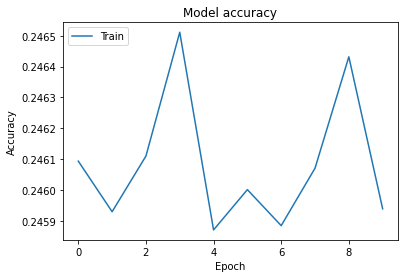

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
'''for weight in range (w2.size):
  if w2[weight] < 0.8348725:
    w2[weight] = 110
  elif 0.8348725 <= w2[weight] < 1.48905:
    w2[weight] = 100
  elif 1.48905 <= w2[weight] < 2.186361:
    w2[weight] = 90
  elif 2.186361 <= w2[weight] < 3.163204:
    w2[weight] = 80
  elif 3.163204 <= w2[weight] < 4.471563:
    w2[weight] = 70
  elif 4.471563 <= w2[weight] < 6.083409:
    w2[weight] = 60
  elif 6.083409 <= w2[weight] < 8.056554:
    w2[weight] = 50
  elif 8.056554 <= w2[weight] < 10.32685:
    w2[weight] = 40
  elif 10.32685 <= w2[weight] < 12.91844:
    w2[weight] = 30
  elif 12.91844 <= w2[weight] < 15.85916:
    w2[weight] = 20
  elif 15.85916 <= w2[weight] < 19.05258:
    w2[weight] = 10
  elif 19.05258 <= w2[weight] <= 22.62194:
    w2[weight] = 0
w2'''

In [ ]:
'''for weight in range (w3.size):
  if w3[weight] < 4.51:
    w3[weight] = 110
  elif 4.51 <= w3[weight] < 4.8:
    w3[weight] = 100
  elif 4.8 <= w3[weight] < 5.3:
    w3[weight] = 90
  elif 5.3 <= w3[weight] < 5.62:
    w3[weight] = 80
  elif 5.62 <= w3[weight] < 6.3272:
    w3[weight] = 70
  elif 6.3272 <= w3[weight] < 7.2559:
    w3[weight] = 60
  elif 7.2559 <= w3[weight] < 8.4352:
    w3[weight] = 50
  elif  8.4352 <= w3[weight] < 9.924:
    w3[weight] = 40
  elif 9.924 <= w3[weight] < 11.784:
    w3[weight] = 30
  elif 11.784 <= w3[weight] < 14.057:
    w3[weight] = 20
  elif 14.057 <= w3[weight] < 16.788:
    w3[weight] = 10
  elif 16.788 <= w3[weight] <= 20.066:
    w3[weight] = 0 '''

In [ ]:
for weight in range (w3.size):
  if w3[weight] < 0.01:
    w3[weight] = 110
  elif 0.01 <= w3[weight] < 0.3059:
    w3[weight] = 100
  elif 0.3059 <= w3[weight] < 0.7146 :
    w3[weight] = 90
  elif 0.7146 <= w3[weight] < 1.2541 :
    w3[weight] = 80
  elif 1.2541 <= w3[weight] < 1.9672 :
    w3[weight] = 70
  elif 1.9672 <= w3[weight] < 2.8959:
    w3[weight] = 60
  elif 2.8959 <= w3[weight] < 4.0752:
    w3[weight] = 50
  elif 4.0752 <= w3[weight] <  5.5645:
    w3[weight] = 40
  elif 5.5645<= w3[weight] < 7.424:
    w3[weight] = 30
  elif 7.424 <= w3[weight] < 9.697:
    w3[weight] = 20
  elif 9.697 <= w3[weight] < 12.428:
    w3[weight] = 10
  elif 12.428 <= w3[weight] <= 15.706:
    w3[weight] = 0

In [ ]:
w3

array([ 70.,  60.,  90.,  10.,  20., 100., 100.,  90.,  50.,  40.,  40.,
        80.,  80., 100.,  80.,  60.,  60.,  90., 100.,  50., 110.,  70.,
       100.,  60.,  80.,  70.,  70.,  80.,  70.,  40.,  50.,  30.,  70.,
        50.,  90., 100.,  90.,  60.,  70.,  40.,  90.,  70.,  70.,  50.,
        90., 100.,  90.,  40.,  60.,  90.,  50.,  50.,  70.,  30.,  90.,
       110.,  30.,  40.,  50.,  70.,  40.,  60.,  60.,  80., 100., 110.,
        40.,  60.,  50.,  50.,  30.,  70.,  80.,  70.,  90.,  90.,  50.,
        50.,  50.,  40.,  50.,  60.,  90.,  80.,  60.,  60.,  60.,  40.,
        80., 100.,  80.,  30.,  30.,  10.,  20.,  20.,  20., 110.,  20.,
        50.], dtype=float32)

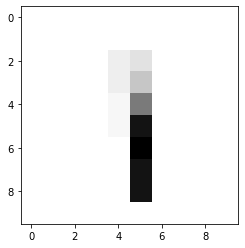

In [ ]:
idx = 3
example_image = x_train_01[idx]
example_image = np.squeeze(example_image, axis =2)
plt.imshow(example_image, cmap='Greys')

In [ ]:
example_image

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2.,  5.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  9.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [ ]:
example2 = x_train_01[idx]
example2 = np.squeeze(example2, axis=-1)
print(example2.shape)

(10, 10)


In [ ]:
example2

In [ ]:
test0 = example2.flatten()

In [ ]:
test0

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       12.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 15.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [ ]:
w1

In [ ]:
weights_10x10 = w1 * 1000
#weights_10x10 *= 1000

In [ ]:
weights_10x10

In [ ]:
for q in range (weights_10x10[0].size):
  for r in range (weights_10x10[1].size):
      if weights_10x10[q][r] < 4.51:
        weights_10x10[q][r]  = 110
      elif 4.51 <= weights_10x10[q][r]  < 4.8:
        weights_10x10[q][r]  = 100
      elif 4.8 <= weights_10x10[q][r]  < 5.3:
        weights_10x10[q][r]  = 90
      elif 5.3 <= weights_10x10[q][r]  < 5.62:
        weights_10x10[q][r]  = 80
      elif 5.62 <= weights_10x10[q][r]  < 6.3272:
        weights_10x10[q][r]  = 70
      elif 6.3272 <= weights_10x10[q][r]  < 7.2559:
        weights_10x10[q][r]  = 60
      elif 7.2559 <= weights_10x10[q][r]  < 8.4352:
        weights_10x10[q][r]  = 50
      elif  8.4352 <= weights_10x10[q][r] < 9.924:
        weights_10x10[q][r]  = 40
      elif 9.924 <= weights_10x10[q][r] < 11.784:
        weights_10x10[q][r]  = 30
      elif 11.784 <= weights_10x10[q][r] < 14.057:
        weights_10x10[q][r]  = 20
      elif 14.057 <= weights_10x10[q][r]  < 16.788:
        weights_10x10[q][r]  = 10
      elif 16.788 <= weights_10x10[q][r]  <= 20.066:
        weights_10x10[q][r]  = 0   

In [ ]:
weights_10x10

In [ ]:
ex1 = x_train_01[4]
ex1 = ex1.flatten()

In [ ]:
ex1

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  4.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  3.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  3.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,
        3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  7.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [ ]:
sum = 0
for i in range(ex1.size):
  t = ex1[i] * w2[i]
  sum = sum + t

In [ ]:
sum

0.5580800175666809

In [ ]:
'''for input in range (example_image2.size):
  example_image2[input] = 316 - (20 * example_image2[input])'''

In [ ]:
for input in range (ex1.size):
  ex1[input] = 316 - (20 * ex1[input])

In [ ]:
ex1

array([316., 316., 316., 316., 316., 316., 316., 316., 316., 316., 316.,
       316., 316., 316., 196., 276., 316., 316., 316., 316., 316., 316.,
       316., 316., 116., 216., 316., 316., 316., 316., 316., 316., 316.,
       316.,  76., 116., 316., 316., 316., 316., 316., 316., 316., 316.,
       296.,  16., 316., 316., 316., 316., 316., 316., 316., 316., 296.,
        16., 316., 316., 316., 316., 316., 316., 316., 316., 296.,  16.,
       276., 316., 316., 316., 316., 316., 316., 316., 316.,  16., 196.,
       316., 316., 316., 316., 316., 316., 316., 316., 156., 236., 316.,
       316., 316., 316., 316., 316., 316., 316., 316., 316., 316., 316.,
       316.])

In [ ]:
ex1[27]

In [ ]:
# CSV file for the threshold voltages
dummy = np.array([0])
w4 = np.hstack((dummy, w3))
test_submission = np.array([w4.T]).T

with open('thresholdVoltage.csv','w') as f:
    csv.writer(f).writerows(test_submission)

In [ ]:
files.download("thresholdVoltage.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# CSV file for the one example image
uu7 = np.hstack((dummy, ex1))
test_image = np.array([uu7.T]).T

with open('inputs_delay.csv','w') as f:
    csv.writer(f).writerows(test_image)

In [ ]:
files.download("inputs_delay.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---


---




                                                         Creating CSV file for Cadence:

---



---



In [ ]:
#Creating CSV file of the weights for CTTs
''' import csv
id = []
for i in np.arange(100):
  id.append(i)

test_submission = np.array([id,w2.T]).T

with open('thresholdVoltageCTT.csv','w') as f:
    csv.writer(f).writerows(test_submission) '''

In [ ]:
w2.shape

(100,)

In [ ]:
zzz= x_test[0]
yyy= x_test[1]
zzz = zzz.flatten()
yyy = yyy.flatten()

bbb = np.vstack((zzz, yyy))
print("z is:", zzz)
print("b is:", bbb)

In [ ]:
id = np.zeros(10,)
for i in np.arange(10):
  id[i] = i + 1

id

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [ ]:
batch_size_test = 50
x_test_batch = np.empty([batch_size_test, 10, 10])

for m in range(batch_size_test):
  for i in range(10):
    for j in range (10):
      x_test_batch[m][i][j] = 316 - (20 * x_test[m][i][j])

In [ ]:
x_test_batch[0]

In [ ]:
x_train_01[4]

In [ ]:
plt.imshow(x_test[0], cmap='Greys')

In [ ]:
# generating text file for a batch of test inputs
fout = open("Simulation.txt", "wt")

for k in range(batch_size_test):
  fout.write("simulator( 'spectre )\ndesign(   \"/home/mkarim21/simulation/Final_system/spectre/schematic/netlist/netlist\")\nresultsDir( \"/home/mkarim21/simulation/Final_system/spectre/schematic\" )\nmodelFile( \n    '(\"$SPECTRE_MODEL_PATH/design_wrapper.lib.scs\" \"tt_pre\")\n)\nanalysis('tran ?stop \"350n\"  )\ndesVar(   \"f\" 20n )\n")
  temp_image = x_test_batch[k]
  temp_image = temp_image.flatten()

  for pixel in range (temp_image.size):
        A = 'desVar(       "Vd{}" {}n )'
        fout.write(A.format(pixel,int(temp_image[pixel])) + "\n")

  fout.write("desVar(   \"wireopt\" 16  )\nenvOption(\n 'analysisOrder  list(\"tran\") \n 'switchViewList  list(\"spectreText\" \"spectre\" \"cmos_sch\" \"cmos.sch\" \"schematic\" \"veriloga\") \n)\ntemp( 27 ) \nrun()\nselectResult( 'tran )\nplot(getData(\"/VGau\") getData(\"/Vc\") )\n\n\n")

fout.close()

In [ ]:
#Creating CSV file of the inputs

id = np.zeros(10000,)

temp1 = x_test[0]
temp1 = temp1.flatten()

for i in np.arange(10000):
  id[i] = i + 1
  if i > 0 :
    temp = x_test[i]
    temp = temp.flatten()
    temp1 = np.vstack((temp1, temp))

id = id.reshape(10000,1)

input_test_images = np.hstack((id,temp1))

with open('input_test.csv','w') as f:
    csv.writer(f).writerows(input_test_images)

In [ ]:
# each row is a flattened version of an image
files.download("input_test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>